In [1]:
import numpy as np 
import os 
from IPython.display import display, Markdown, Image

os.chdir("..")
os.chdir("..")

from driver_folder.shared.graph import plot_graph_from_adj_list

# Queue 

In [2]:
class Queue:
    def __init__(self):
        self.queue = []
    
    def addq(self , value_to_add):
        self.queue.append(value_to_add)
        
    def delq(self):
        v = None 
        if not self.is_empty(): 
            v = self.queue.pop(0)
        return v
    
    def is_empty(self):
        return self.queue == []
    
    def __str__(self):
        return str(self.queue)
    
    

In [3]:
q = Queue()
for i in range(3):
    q.addq(i)
print(q)
print(q.is_empty())
for j in range(3):
    print(q.delq(),q)
print(q.is_empty())

[0, 1, 2]
False
0 [1, 2]
1 [2]
2 []
True


In [4]:


AMat = np.array([
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
])

In [5]:
fig = plot_graph_from_adj_list(adj_list=AMat)

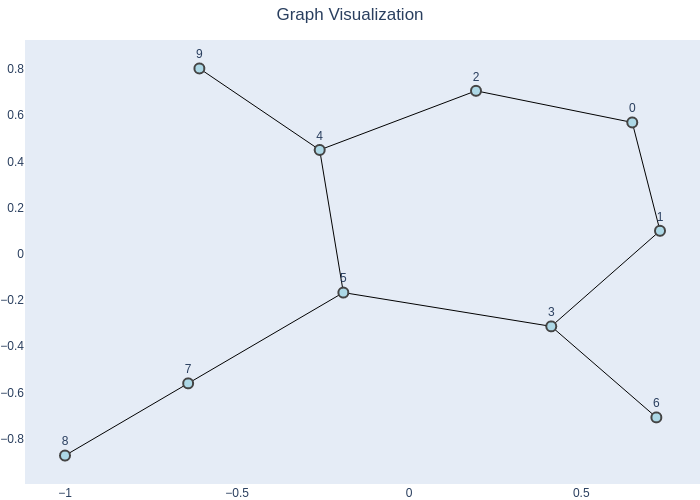

In [6]:
# Save the graph as an image
fig.write_image("graph_image.png")
    
# Display the plot
display(Image(filename="graph_image.png"))


# BFS using Adjacency Matrix

In [7]:
def neighbours(AMat , j):
    neighbour = []
    for col in range(AMat.shape[1]):
        if AMat[j,col] ==1:
            neighbour.append(col)
    return neighbour    

In [8]:
def BFS( AMat : np.array , V : int ):
    
    
    rows , cols = AMat.shape 
    
    visited = {}
    
    for node in range(rows):
        visited[node] = False
        
    queue= Queue()
    visited[V] = True 
    
    queue.addq(V)
    
    while not queue.is_empty():
        j = queue.delq()
        for N in neighbours(AMat=AMat, j = j):
            if not visited[N]:
                queue.addq(N)
                visited[N] = True 
    return visited
        
    
    

In [9]:
start_vertex = 0
visited = BFS(AMat, start_vertex)
print(visited)


{0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True}


# BFS using Adjacency list  

In [10]:
def adj_matrix_to_list(AMat):
    Alist = {}
    rows, cols = AMat.shape
    for i in range(rows):
        Alist[i] = []
        for j in range(cols):
            if AMat[i, j] == 1:
                Alist[i].append(j)
    return Alist

In [11]:
AList = adj_matrix_to_list(AMat=AMat)

In [12]:
def BFSListPath(Alist : dict , start_vertex : int ):
    
    visited , parent = {} , {}
    
    for row in Alist.keys():
        visited[row] = False
        parent[row] = -1 
    queue = Queue()
    visited[start_vertex] = True 
    queue.addq(start_vertex)
    
    while not queue.is_empty():
        parent_node = queue.delq()
        for child in Alist[parent_node]:
            if not visited[child]:
                queue.addq(child)
                visited[child] = True 
                parent[child] = parent_node
    return visited, parent  

In [13]:
# Starting vertex
v = 0

# Perform BFS
visited, parent = BFSListPath(AList, v)
print("Visited:", visited)
print("Parent:", parent)

Visited: {0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True}
Parent: {0: -1, 1: 0, 2: 0, 3: 1, 4: 2, 5: 3, 6: 3, 7: 5, 8: 7, 9: 4}


# DFS using Global Parent & Visited 

In [14]:
PARENT , VISITED = {} , {}

def DFS_Init_Global(AMat):
    
    rows , cols = AMat.shape
    
    for node in range(rows):
        PARENT[node] = -1 
        VISITED[node] = False
        
def DFS_Global(AMat, V):
    VISITED[V] = True 
    for child in neighbours(AMat=AMat, j=V):
        if not VISITED[child]:
            PARENT[child] = V
            DFS_Global(AMat=AMat,V=child)
    return

In [15]:

# Starting node
start_node = 0
DFS_Init_Global(AMat=AMat)
DFS_Global(AMat=AMat, V= start_node)
print("Visited nodes:", VISITED)
print("Parent nodes:", PARENT)

Visited nodes: {0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True}
Parent nodes: {0: -1, 1: 0, 2: 4, 3: 1, 4: 5, 5: 3, 6: 3, 7: 5, 8: 7, 9: 4}


In [16]:
#Application Of BFS and DFS

In [17]:
def Components(AList):
    component = {}
    for row in AList.keys():
        component[row] = -1 
    comp_id , seen = 0,0 
    while seen <= max(AList.keys()):
        start_vertex_depth = min([i for i in AList.keys() if component[i] == -1])
        visited , _ = BFSListPath(AList, start_vertex_depth)
        for node in visited.keys():
            if visited[node]:
                seen += 1
                component[node] = comp_id
        comp_id += 1
        
    return component
        

In [18]:
def Components(AList):
    component = {}
    for i in AList.keys():
        component[i] = -1
    (compid,seen) = (0,0)
    while seen <= max(AList.keys()):
        startv = min([i for i in AList.keys()
                      if component[i] == -1])
        visited , _ = BFSListPath(AList,startv)
        for i in visited.keys():
            if visited[i]:
                seen = seen + 1
                component[i] = compid
        compid = compid + 1
    return(component)

In [19]:
Components(AList)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [20]:
Amat = np.array([
[0,1,1,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0], 
    [1,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0 ,0],
    [0,0,0,1,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,1,0,0,0]])


In [21]:
adj_list = adj_matrix_to_list(Amat)

In [22]:
fig = plot_graph_from_adj_list(adj_list)

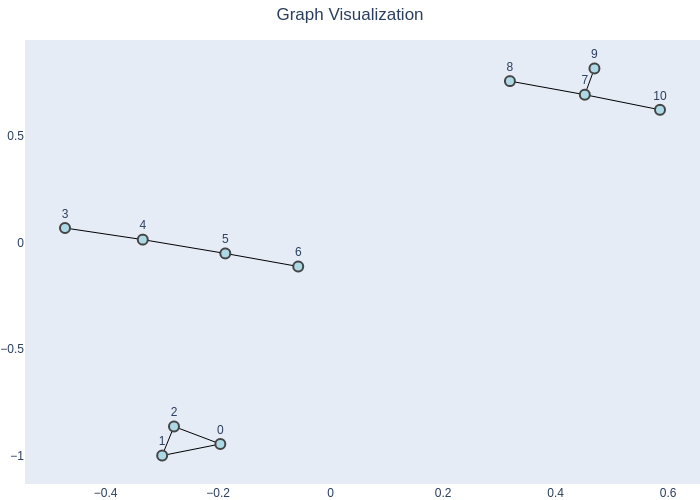

In [23]:
# Save the graph as an image
fig.write_image("graph_image1.png")

# Display the plot
display(Image(filename="graph_image1.png"))

In [24]:
Components(adj_list)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2, 10: 2}